##### Dataset

In [1]:
# banknotes.csv, petrol_consumption.csv, iris.csv, wine-class.csv
# https://mitu.co.in/dataset

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_csv('datasets/banknotes.csv')

In [4]:
# input features
x = df.drop('Class', axis = 1)

# Output features
y = df['Class']

##### Cross Validation

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [7]:
x_train.shape

(1029, 4)

In [8]:
x_test.shape

(343, 4)

##### Build the Model

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf_rf = RandomForestClassifier( random_state= 0, n_estimators= 10)

In [31]:
clf_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

##### Performance Evaluation

In [32]:
y_pred = clf_rf.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [34]:
accuracy_score(y_test, y_pred)

0.9941690962099126

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [36]:
print(confusion_matrix(y_test, y_pred))

[[193   2]
 [  0 148]]


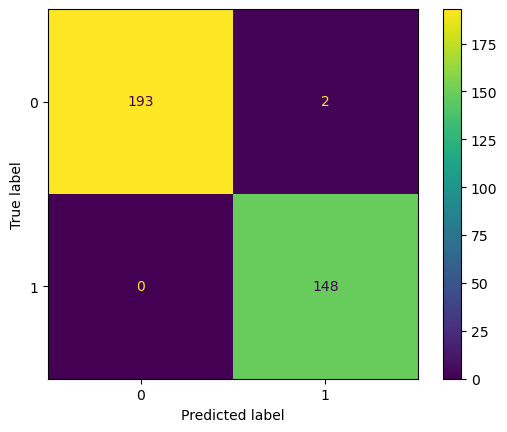

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [38]:
# with n_estimator 10  --- 99.41 % accuracy 
# change it to see the accuracy score , and find suitable value of n_estimator
# at 5 -- Accuracy is 98.83
# so ideal value of n_estimator in this case is 10 

In [39]:
clf_rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035)]

##### Visualize the tree

In [40]:
from sklearn.tree import plot_tree

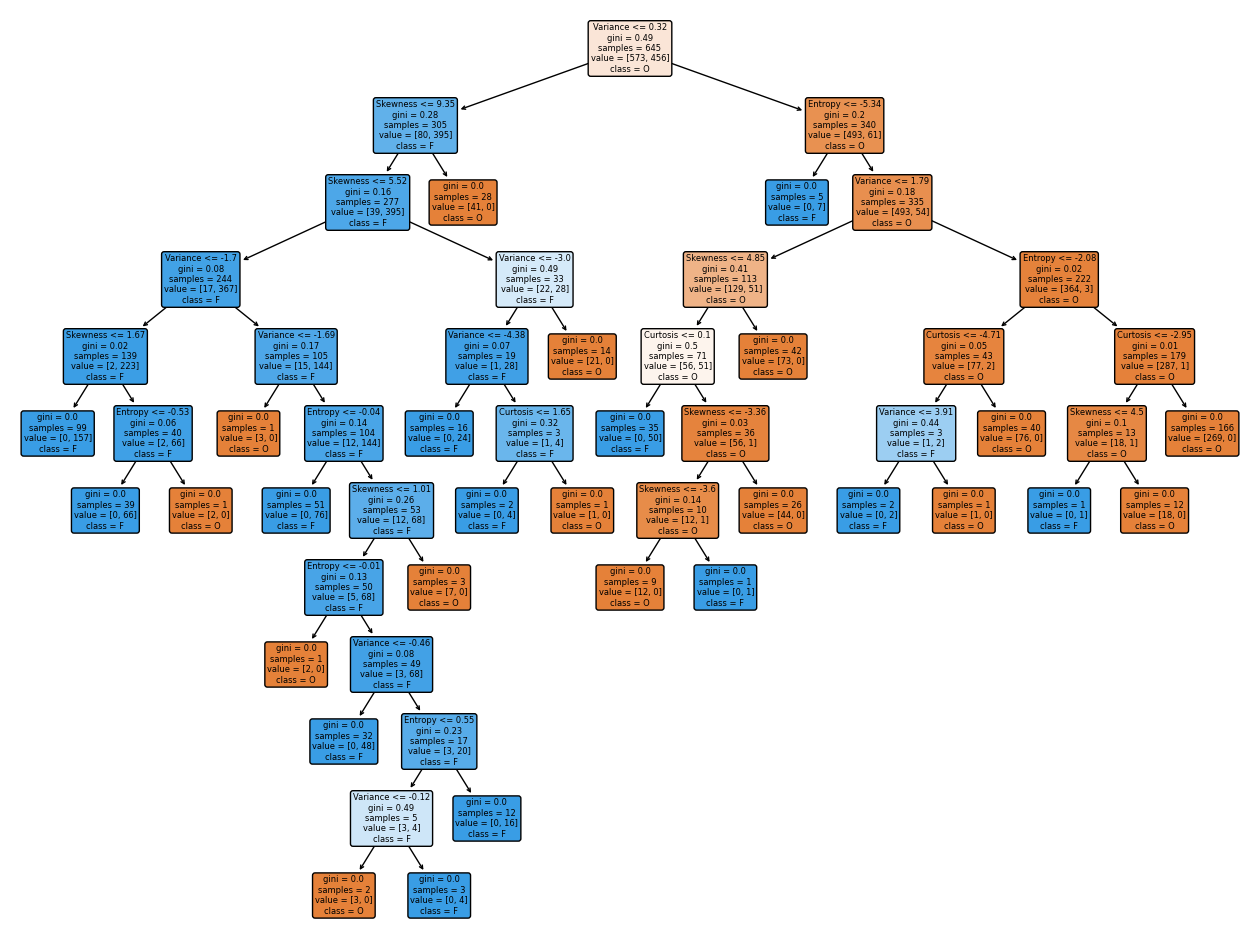

In [42]:
plt.figure(figsize=(16,12))
plot_tree(clf_rf.estimators_[3], fontsize=6, feature_names=x.columns, filled = True, precision=2, class_names=['O','F'], rounded= True);
plt.savefig('subtree.png')

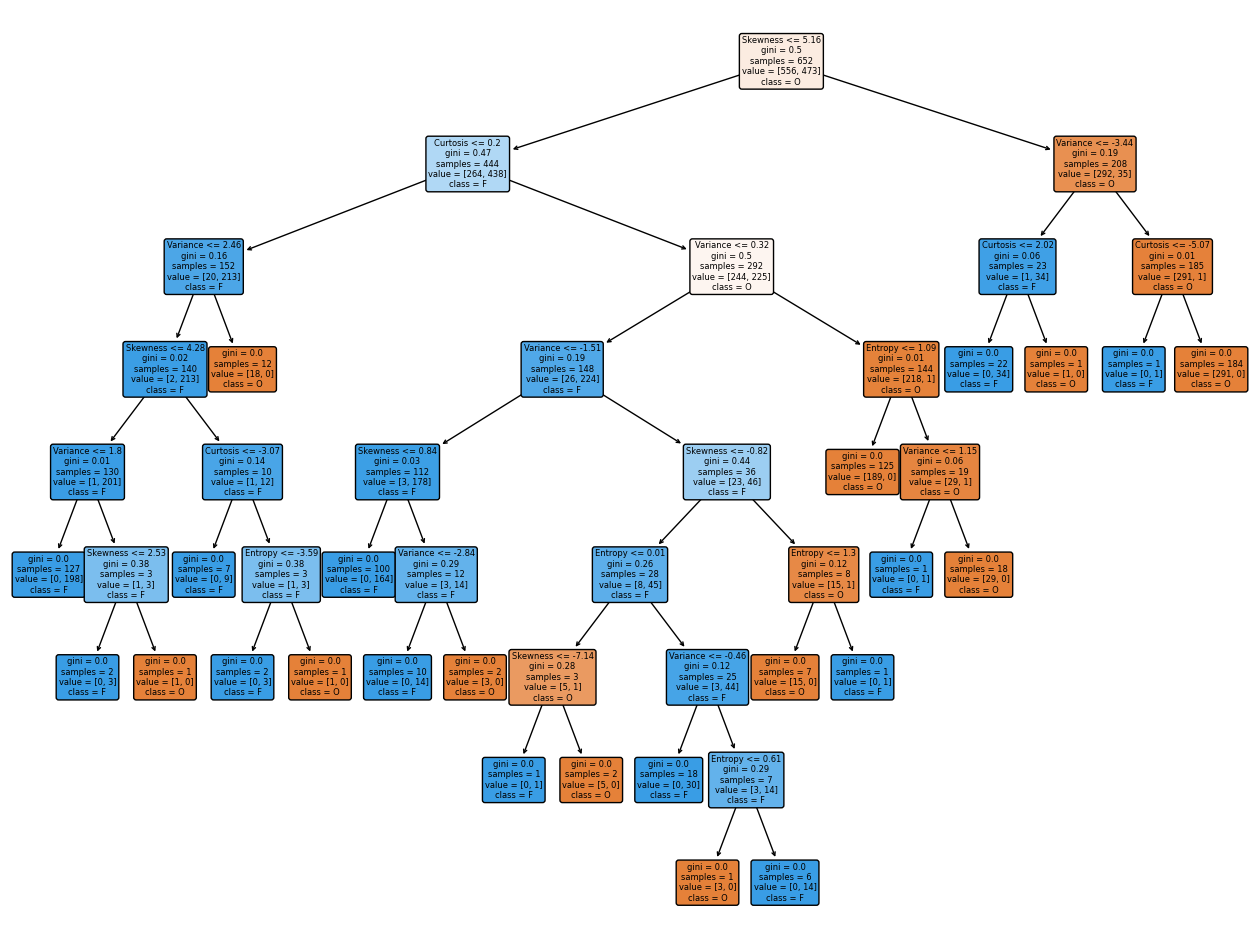

In [43]:
plt.figure(figsize=(16,12))
plot_tree(clf_rf.estimators_[5], fontsize=6, feature_names=x.columns, filled = True, precision=2, class_names=['O','F'], rounded= True);
plt.savefig('subtree1.png')

In [44]:
# How much time it takes to train the algorithm

In [45]:
%%time
clf_rf.fit(x_train, y_train)

CPU times: total: 15.6 ms
Wall time: 32 ms


RandomForestClassifier(n_estimators=10, random_state=0)

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=0)

In [47]:
%%time
clf_tree.fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 5 ms


DecisionTreeClassifier(random_state=0)

In [48]:
import time

In [49]:
time.time()

1720726317.3891158

In [50]:
time.asctime()

'Fri Jul 12 01:04:29 2024'

In [51]:
start = time.time()
print('Hello, World')
end = time.time()

Hello, World


In [52]:
end - start

0.0

In [53]:
start = time.time()
clf_tree.fit(x_train, y_train)
end = time.time()
print('Decision Tree time taken:', end - start)

start = time.time()
clf_rf.fit(x_train, y_train)
end = time.time()
print('Random Forest time taken:', end - start)

Decision Tree time taken: 0.004527091979980469
Random Forest time taken: 0.025994539260864258
